#IMPORTATIONS

In [2]:
import matplotlib.pyplot as plt
import numpy as np
from scipy import io

#DATA

In [3]:
data = io.loadmat('signal.mat')

In [5]:
type(data)

dict

In [4]:
data.keys()

dict_keys(['__header__', '__version__', '__globals__', 'ver', 'actual_ver'])

In [6]:
signal = data['ver']

In [7]:
signal.shape

(100, 500)

We have 100 signals and each one has 500 samples. Applying the ensemble averaging method to this data will average 100 signals and produce one signal with 500 samples.

In [8]:
# Calculate the sampling rate
sampling_rate = 200.0
# Calculate the duration of the recordings
duration = signal.shape[1]/sampling_rate
# Generate the time axis of the recordings
time_axis = np.arange(0, duration, 1/sampling_rate)

Let's visualize the first 10 signals.

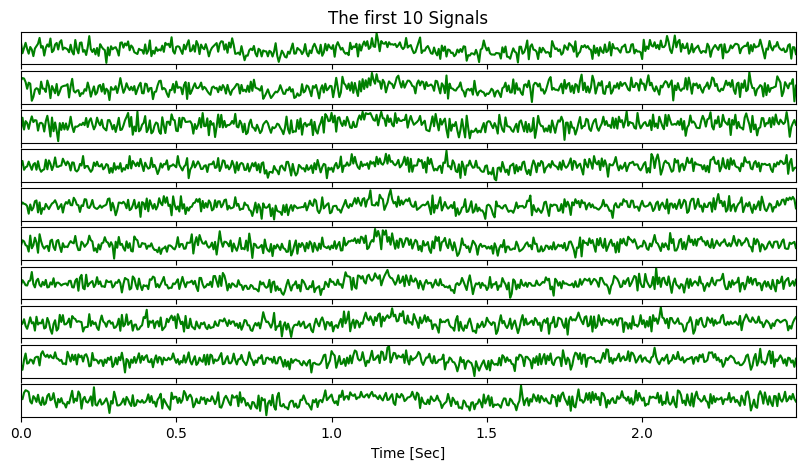

In [18]:
# Subplot figure with 10 rows and one column
fig, axs = plt.subplots(10, figsize=(10,5), sharex=True)

# Plot the first 10 recordings
for i in range(10):
    axs[i].plot(time_axis, signal[i,:], color='green')
    # Hide the values of y-axis
    axs[i].set_yticks([])
    # Fit the x-axis along the signal
    axs[i].set_xlim([time_axis[0], time_axis[-1]])

# Set a title and xlabel
axs[0].set_title('The first 10 Signals')
axs[9].set_xlabel('Time [Sec]')
plt.show()

#ENSEMBLE AVERAGING

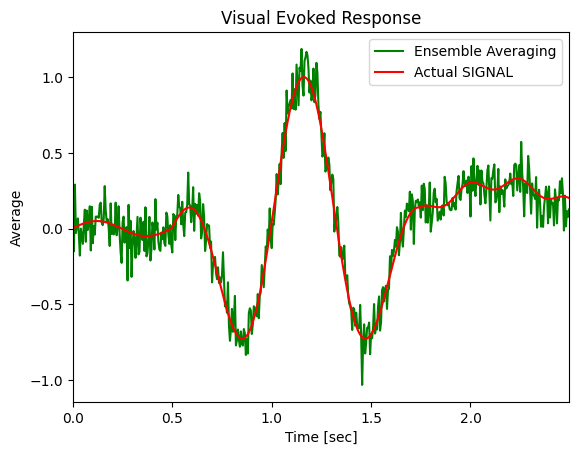

In [20]:
# Apply the ensamble averaging method on the Recordings.
avg_signal = np.mean(signal, axis=0)
# Extract the actual VER from the Mat file
actual_signal = np.reshape(data['actual_ver'], [500])

# Plot the ensambled EEG recordings and the actual VER
plt.plot(time_axis, avg_signal, color='green', label='Ensemble Averaging')
plt.plot(time_axis, actual_signal, color='red', label='Actual SIGNAL')
plt.xlim([time_axis[0], time_axis[-1]])
plt.xlabel('Time [sec]')
plt.ylabel('Average')
plt.title('Visual Evoked Response')
plt.legend()
plt.show()

Thanks to Ensemble Averaging, we can approximate the actual VER.